# Deal offline

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch

In [2]:
path = '2022/meter/'
dates = os.listdir(path)

all = set()

id_map = {}

count = 0

for date in tqdm(dates[:]):
    files = [f for f in os.listdir(path + date) if f.endswith('csv')]
    # print(date)
    
    for file in files[:]:
        # print(file)
        f = open(path + date + '/' + file, 'r')
        f.readline()
        lines = f.read().splitlines()
        f.close()

        count += 1
        
        for line in lines[:]:
            try:
                id, s, o, t = line.split(',')
                all.add(id)
                if s != 'NA':
                    if id in id_map:
                        id_map[id] += 1
                    else:
                        id_map[id] = 1
            except:
                pass
            

100%|██████████| 118/118 [11:53<00:00,  6.04s/it]


Text(0, 0.5, 'Number of meters')

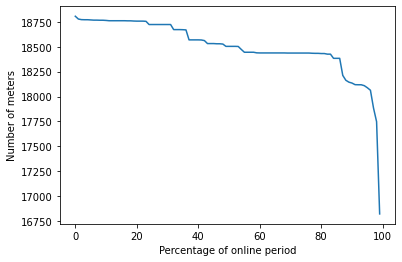

In [4]:
onlines = np.array(list(id_map.values()))

x_time_percent_online = []
y_online_count = []

for i in range(100):
    x_time_percent_online.append(i)
    y_online_count.append((onlines > (count * i / 100)).sum())
    
plt.plot(x_time_percent_online, y_online_count)
plt.xlabel('Percentage of online period')
plt.ylabel('Number of meters')

In [6]:
usable_ids = set()

rate = 0.995
for id, online in id_map.items():
    if online > count * rate:
        usable_ids.add(id)
        
len(usable_ids)

5525

#### usable meter id to csv

In [7]:
meter_table = pd.read_csv('2022/meter_detail.csv')

pole_idx = {}
park_idx = {}

for i, row in meter_table.iterrows():
    pole_idx[row['PoleId']] = i
    park_idx[row['ParkingSpaceId']] = i

f = open('2022/meter_index.csv', 'w')

count = 0
for id in sorted(usable_ids):
    if id in park_idx:
        idx = park_idx[id]
    elif id[:-1] in pole_idx:
        idx = pole_idx[id]
    else:
        continue
    lat = meter_table['Latitude'][idx]
    lon = meter_table['Longitude'][idx]
    f.write(','.join([str(count), id, str(lat), str(lon)]) + '\n')
    count += 1
    
f.close()
count

5520

### build dataset

In [8]:
f = open('2022/meter_index.csv', 'r')
lines = f.read().splitlines()
f.close()

park_index = {}

for line in lines:
    idx, id, lat, lon = line.split(',')
    park_index[id] = int(idx)

In [9]:
path = '2022/meter'
save_path = '2022/meter_dataset'

dates = os.listdir(path)

size = len(park_index)

last = torch.ones(size, dtype=bool)

count = 0

for date in tqdm(dates[:]):
    files = [f for f in os.listdir(os.path.join(path, date)) if f.endswith('csv')]
    print(date)
    if len(files) != 288:
        print(date)
        # break
    for file in files[:]:
        # print(file)
        f = open(os.path.join(path, date, file), 'r')
        f.readline()
        lines = f.read().splitlines()
        f.close()
        data = torch.zeros(size, dtype=bool)
        for line in lines[:]:
            try:
                id, s, o, t = line.split(',')
                if id in park_index:
                    idx = park_index[id]
                    if s != 'NA':
                        value = (o == 'O')
                    else:
                        value = last[idx]
                    data[idx] = value
            except:
                pass
        
        torch.save(data, os.path.join(save_path, '%d.pt'%count))
        count += 1

print(last)

  0%|          | 0/118 [00:00<?, ?it/s]

20211231
20211231


  1%|          | 1/118 [00:02<04:43,  2.43s/it]

20220101


  2%|▏         | 2/118 [00:09<10:26,  5.40s/it]

20220102


  3%|▎         | 3/118 [00:17<12:10,  6.35s/it]

20220103


  3%|▎         | 4/118 [00:24<12:50,  6.76s/it]

20220104


  4%|▍         | 5/118 [00:32<13:15,  7.04s/it]

20220105


  5%|▌         | 6/118 [00:39<13:30,  7.24s/it]

20220106


  6%|▌         | 7/118 [00:47<13:31,  7.31s/it]

20220107


  7%|▋         | 8/118 [00:54<13:30,  7.37s/it]

20220108


  8%|▊         | 9/118 [01:02<13:26,  7.40s/it]

20220109


  8%|▊         | 10/118 [01:09<13:20,  7.41s/it]

20220110


  9%|▉         | 11/118 [01:17<13:13,  7.42s/it]

20220111


 10%|█         | 12/118 [01:24<13:05,  7.41s/it]

20220112


 11%|█         | 13/118 [01:31<12:55,  7.39s/it]

20220113


 12%|█▏        | 14/118 [01:39<12:46,  7.37s/it]

20220114


 13%|█▎        | 15/118 [01:46<12:27,  7.25s/it]

20220115


 14%|█▎        | 16/118 [01:53<12:21,  7.27s/it]

20220116


 14%|█▍        | 17/118 [02:00<12:16,  7.29s/it]

20220117


 15%|█▌        | 18/118 [02:08<12:14,  7.35s/it]

20220118


 16%|█▌        | 19/118 [02:15<12:11,  7.39s/it]

20220119


 17%|█▋        | 20/118 [02:23<12:05,  7.41s/it]

20220120


 18%|█▊        | 21/118 [02:30<12:01,  7.44s/it]

20220121


 19%|█▊        | 22/118 [02:38<11:56,  7.46s/it]

20220122


 19%|█▉        | 23/118 [02:45<11:48,  7.46s/it]

20220123


 20%|██        | 24/118 [02:53<11:46,  7.51s/it]

20220124


 21%|██        | 25/118 [03:01<11:42,  7.56s/it]

20220125


 22%|██▏       | 26/118 [03:08<11:38,  7.59s/it]

20220126


 23%|██▎       | 27/118 [03:17<11:55,  7.86s/it]

20220127


 24%|██▎       | 28/118 [03:25<11:55,  7.95s/it]

20220128


 25%|██▍       | 29/118 [03:33<11:50,  7.98s/it]

20220129


 25%|██▌       | 30/118 [03:41<11:49,  8.06s/it]

20220130


 26%|██▋       | 31/118 [03:49<11:46,  8.12s/it]

20220131


 27%|██▋       | 32/118 [03:58<11:38,  8.13s/it]

20220201


 28%|██▊       | 33/118 [04:06<11:31,  8.13s/it]

20220202


 29%|██▉       | 34/118 [04:14<11:22,  8.13s/it]

20220203


 30%|██▉       | 35/118 [04:22<11:16,  8.15s/it]

20220204


 31%|███       | 36/118 [04:30<11:06,  8.12s/it]

20220205


 31%|███▏      | 37/118 [04:38<10:58,  8.13s/it]

20220206


 32%|███▏      | 38/118 [04:46<10:51,  8.15s/it]

20220207


 33%|███▎      | 39/118 [04:55<10:50,  8.23s/it]

20220208


 34%|███▍      | 40/118 [05:03<10:34,  8.14s/it]

20220209


 35%|███▍      | 41/118 [05:10<10:11,  7.95s/it]

20220210


 36%|███▌      | 42/118 [05:18<09:54,  7.82s/it]

20220211


 36%|███▋      | 43/118 [05:25<09:39,  7.73s/it]

20220212


 37%|███▋      | 44/118 [05:33<09:26,  7.65s/it]

20220213


 38%|███▊      | 45/118 [05:40<09:15,  7.61s/it]

20220214


 39%|███▉      | 46/118 [05:48<09:05,  7.58s/it]

20220215


 40%|███▉      | 47/118 [05:55<08:56,  7.55s/it]

20220216


 41%|████      | 48/118 [06:03<08:47,  7.54s/it]

20220217


 42%|████▏     | 49/118 [06:10<08:39,  7.53s/it]

20220218


 42%|████▏     | 50/118 [06:18<08:30,  7.51s/it]

20220219


 43%|████▎     | 51/118 [06:25<08:23,  7.51s/it]

20220220


 44%|████▍     | 52/118 [06:33<08:16,  7.52s/it]

20220221


 45%|████▍     | 53/118 [06:40<08:05,  7.46s/it]

20220222


 46%|████▌     | 54/118 [06:48<07:58,  7.48s/it]

20220223


 47%|████▋     | 55/118 [06:55<07:52,  7.49s/it]

20220224


 47%|████▋     | 56/118 [07:03<07:45,  7.51s/it]

20220225


 48%|████▊     | 57/118 [07:10<07:39,  7.53s/it]

20220226


 49%|████▉     | 58/118 [07:18<07:32,  7.54s/it]

20220227


 50%|█████     | 59/118 [07:25<07:25,  7.55s/it]

20220228


 51%|█████     | 60/118 [07:33<07:17,  7.54s/it]

20220301


 52%|█████▏    | 61/118 [07:41<07:10,  7.56s/it]

20220302


 53%|█████▎    | 62/118 [07:48<07:03,  7.56s/it]

20220303


 53%|█████▎    | 63/118 [07:56<06:57,  7.59s/it]

20220304


 54%|█████▍    | 64/118 [08:03<06:49,  7.59s/it]

20220305


 55%|█████▌    | 65/118 [08:11<06:41,  7.58s/it]

20220306


 56%|█████▌    | 66/118 [08:19<06:35,  7.60s/it]

20220307


 57%|█████▋    | 67/118 [08:26<06:26,  7.59s/it]

20220308


 58%|█████▊    | 68/118 [08:33<06:13,  7.47s/it]

20220309


 58%|█████▊    | 69/118 [08:41<06:06,  7.48s/it]

20220310


 59%|█████▉    | 70/118 [08:48<05:59,  7.50s/it]

20220311


 60%|██████    | 71/118 [08:56<05:52,  7.49s/it]

20220312


 61%|██████    | 72/118 [09:03<05:44,  7.50s/it]

20220313


 62%|██████▏   | 73/118 [09:11<05:37,  7.50s/it]

20220314


 63%|██████▎   | 74/118 [09:18<05:30,  7.51s/it]

20220315


 64%|██████▎   | 75/118 [09:26<05:24,  7.55s/it]

20220316


 64%|██████▍   | 76/118 [09:34<05:20,  7.63s/it]

20220317


 65%|██████▌   | 77/118 [09:42<05:13,  7.65s/it]

20220318


 66%|██████▌   | 78/118 [09:49<05:06,  7.66s/it]

20220319


 67%|██████▋   | 79/118 [09:57<04:58,  7.66s/it]

20220320


 68%|██████▊   | 80/118 [10:05<04:51,  7.66s/it]

20220321


 69%|██████▊   | 81/118 [10:12<04:43,  7.65s/it]

20220322


 69%|██████▉   | 82/118 [10:20<04:35,  7.64s/it]

20220323


 70%|███████   | 83/118 [10:27<04:27,  7.63s/it]

20220324


 71%|███████   | 84/118 [10:35<04:19,  7.62s/it]

20220325


 72%|███████▏  | 85/118 [10:43<04:11,  7.62s/it]

20220326


 73%|███████▎  | 86/118 [10:50<04:04,  7.63s/it]

20220327


 74%|███████▎  | 87/118 [10:58<03:56,  7.63s/it]

20220328


 75%|███████▍  | 88/118 [11:06<03:48,  7.63s/it]

20220329


 75%|███████▌  | 89/118 [11:13<03:41,  7.63s/it]

20220330


 76%|███████▋  | 90/118 [11:21<03:33,  7.62s/it]

20220331


 77%|███████▋  | 91/118 [11:28<03:25,  7.61s/it]

20220401


 78%|███████▊  | 92/118 [11:36<03:17,  7.59s/it]

20220402


 79%|███████▉  | 93/118 [11:44<03:09,  7.57s/it]

20220403


 80%|███████▉  | 94/118 [11:51<03:00,  7.54s/it]

20220404


 81%|████████  | 95/118 [11:58<02:52,  7.52s/it]

20220405


 81%|████████▏ | 96/118 [12:06<02:45,  7.53s/it]

20220406


 82%|████████▏ | 97/118 [12:14<02:38,  7.54s/it]

20220407


 83%|████████▎ | 98/118 [12:21<02:29,  7.49s/it]

20220408


 84%|████████▍ | 99/118 [12:28<02:19,  7.37s/it]

20220409


 85%|████████▍ | 100/118 [12:35<02:10,  7.25s/it]

20220410


 86%|████████▌ | 101/118 [12:42<02:02,  7.18s/it]

20220411


 86%|████████▋ | 102/118 [12:49<01:54,  7.13s/it]

20220412


 87%|████████▋ | 103/118 [12:56<01:46,  7.08s/it]

20220413


 88%|████████▊ | 104/118 [13:03<01:38,  7.07s/it]

20220414


 89%|████████▉ | 105/118 [13:10<01:30,  6.93s/it]

20220415


 90%|████████▉ | 106/118 [13:17<01:23,  6.96s/it]

20220416


 91%|█████████ | 107/118 [13:24<01:16,  6.99s/it]

20220417


 92%|█████████▏| 108/118 [13:31<01:09,  7.00s/it]

20220418


 92%|█████████▏| 109/118 [13:38<01:03,  7.00s/it]

20220419


 93%|█████████▎| 110/118 [13:45<00:56,  7.02s/it]

20220420


 94%|█████████▍| 111/118 [13:52<00:49,  7.02s/it]

20220421


 95%|█████████▍| 112/118 [13:59<00:42,  7.03s/it]

20220422


 96%|█████████▌| 113/118 [14:06<00:35,  7.03s/it]

20220423


 97%|█████████▋| 114/118 [14:13<00:28,  7.03s/it]

20220424


 97%|█████████▋| 115/118 [14:20<00:21,  7.03s/it]

20220425


 98%|█████████▊| 116/118 [14:27<00:14,  7.04s/it]

20220426


 99%|█████████▉| 117/118 [14:34<00:07,  7.04s/it]

20220427


100%|██████████| 118/118 [14:41<00:00,  7.47s/it]

tensor([True, True, True,  ..., True, True, True])


In [30]:
sum(last)

tensor(6225)

## Meter Link

In [131]:
f = open('meter_index.csv', 'r')
lines = f.read().splitlines()
f.close()

park_list = []

for line in lines:
    index, park, lat, lon = line.split(',')
    park_list.append((int(index), float(lat), float(lon)))
    
size = len(park_list)
    
link_graph = np.zeros((size, size), dtype=bool)
print(link_graph.shape)

threshold = 1e-2

for park in tqdm(park_list):
    i, lat, lon = park

    for neighbor in park_list[i:]:
        j, j_lat, j_lon = neighbor
        if ((lat - j_lat)**2 + (lon - j_lon)**2)**0.5 < threshold:
            link_graph[i, j] = True
            link_graph[j, i] = True
            
res = [[], []]

m, n = link_graph.shape

for i in tqdm(range(m)):
    for j in range(n):
        if link_graph[i, j] and i != j:
            res[0].append(i)
            res[1].append(j)
            
edge_graph = torch.tensor(res)

torch.save(edge_graph, 'meter_dataset/link.pt')

(6225, 6225)


100%|██████████| 6225/6225 [00:05<00:00, 1092.11it/s]


#### Draw group on map

In [132]:
import numpy as np
from tqdm import tqdm

visited = [0] * size
group_list = []

def dfs(i, local):
    # print(len(local))
    local.append(i)
    for j, v in enumerate(link_graph[i]):
        if v == True and j != i and visited[j] == 0:
            visited[j] = 1
            dfs(j, local)

for i in tqdm(range(len(link_graph))[:]):
    if visited[i] == 0:
        local = []
        visited[i] = 1
        dfs(i, local)
        group_list.append(local)
    

f = open('meter_index.csv', 'r')
lines = f.read().splitlines()
f.close()

park_list = []

for line in lines:
    index, park, lat, lon = line.split(',')
    park_list.append((float(lat), float(lon)))

100%|██████████| 6225/6225 [00:28<00:00, 220.21it/s] 


(22.194, 22.554)

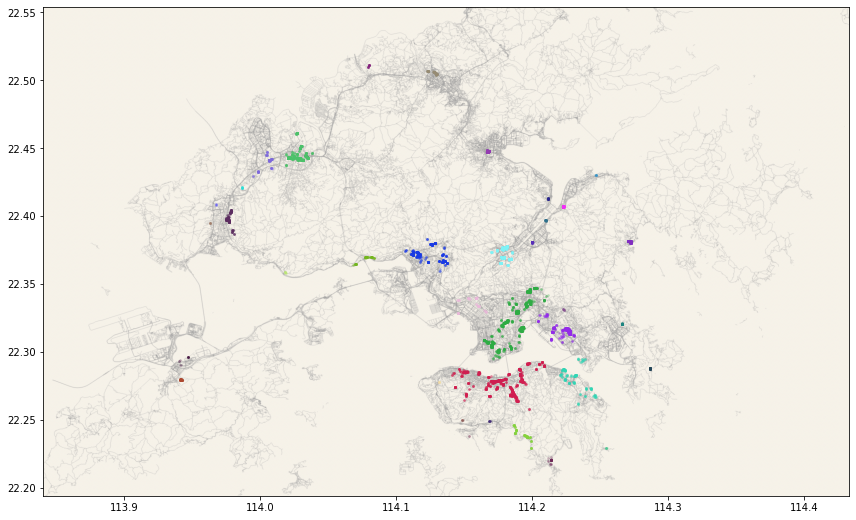

In [133]:
import random

plt.figure(figsize=(15, 9))
bg = plt.imread('hk.png')
plt.imshow(bg, extent=[113.84, 114.433, 22.194, 22.554])

for group in group_list:
    r = random.randint(16, 255)
    g = random.randint(16, 255)
    b = random.randint(16, 255)
    color = '#%x%x%x'%(r, g, b)
    
    lats = []
    lons = []
    
    for i in group:
        lat, lon = park_list[i]
        lats.append(lat)
        lons.append(lon)
        
    plt.scatter(lons, lats, c=color, s=3, linewidths=None, alpha=0.2)

plt.xlim(113.84, 114.433)
plt.ylim(22.194, 22.554)

### Average park time

In [32]:
path = 'meter_dataset'

size = len(torch.load(os.path.join(path, '0.pt')))

last = np.zeros(size, dtype=int)

period_list = []
# period_list = np.empty(0)

for i in tqdm(range(len(os.listdir(path)) - 1)):
    data = torch.load(os.path.join(path, '%d.pt'%i)).numpy()
    last += data
    
    # period = last[data == False]
    # period_list = np.concatenate((period, period_list))
    # last[data == False] = 0
    
    for j in range(size):
        if data[j] == False and last[j] > 0:
            period_list.append(last[j])
            last[j] = 0
            

100%|██████████| 24480/24480 [04:41<00:00, 87.06it/s] 


In [33]:
sum(period_list) / len(period_list)

44.36017227008083

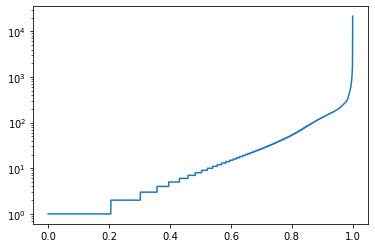

In [69]:
x = np.linspace(0, 1, len(period_list))

plt.semilogy(x, sorted(period_list))